In [2]:
print("GRACE")

GRACE


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

%matplotlib inline

In [4]:
df=pd.read_csv('training_data.csv')
df.head()

,Unnamed: 0,Timestamp,\\DESKTOP-FUOCR3U\Processor(_Total)\% Processor Time,\\DESKTOP-FUOCR3U\Processor(_Total)\% Idle Time,\\DESKTOP-FUOCR3U\Memory\Available MBytes,\\DESKTOP-FUOCR3U\LogicalDisk(_Total)\% Disk Time
0,0,2023-04-28 05:59:48.490,13.959073,52.460838,6768,1.661641
1,1,2023-04-28 06:03:48.490,2.257027,72.309335,6830,0.121271
2,2,2023-04-28 06:07:48.490,4.805736,50.994980,6676,0.412856
3,3,2023-04-28 06:11:48.490,22.811708,40.117944,4861,2.065038
4,4,2023-04-28 06:15:48.490,8.991300,54.365496,4775,0.318020


In [5]:
df = df.rename(columns={df.columns[2]: 'Processor Time'})
df = df.rename(columns={df.columns[3]: 'Idle_Time'})
df = df.rename(columns={df.columns[4]: 'Available'})
df = df.rename(columns={df.columns[5]: 'Disk_Time'})
df.head()


,Unnamed: 0,Timestamp,Processor Time,Idle_Time,Available,Disk_Time
0,0,2023-04-28 05:59:48.490,13.959073,52.460838,6768,1.661641
1,1,2023-04-28 06:03:48.490,2.257027,72.309335,6830,0.121271
2,2,2023-04-28 06:07:48.490,4.805736,50.994980,6676,0.412856
3,3,2023-04-28 06:11:48.490,22.811708,40.117944,4861,2.065038
4,4,2023-04-28 06:15:48.490,8.991300,54.365496,4775,0.318020


In [6]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])


In [7]:
df.set_index('Timestamp', inplace=True)

<AxesSubplot:xlabel='Timestamp', ylabel='Idle_Time'>

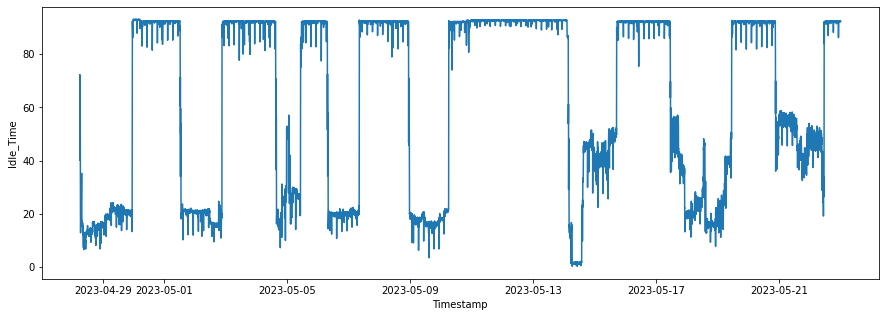

In [8]:
plt.figure(figsize=(15,5))

sns.lineplot(data=df, x = df.index, y = df.Idle_Time)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8911 entries, 2023-04-28 05:59:48.490000 to 2023-05-22 23:59:48.490000
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      8911 non-null   int64  
 1   Processor Time  8911 non-null   float64
 2   Idle_Time       8911 non-null   float64
 3   Available       8911 non-null   int64  
 4   Disk_Time       8911 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 417.7 KB


In [10]:
df['rollMean'] = df.Idle_Time.rolling(window=1000).mean()
df['rollStd'] = df.Idle_Time.rolling(window=1000).std()


In [11]:
df

,Unnamed: 0,Processor Time,Idle_Time,Available,Disk_Time,rollMean,rollStd
Timestamp,,,,,,,
2023-04-28 05:59:48.490,0,13.959073,52.460838,6768,1.661641,NaN,NaN
2023-04-28 06:03:48.490,1,2.257027,72.309335,6830,0.121271,NaN,NaN
2023-04-28 06:07:48.490,2,4.805736,50.994980,6676,0.412856,NaN,NaN
2023-04-28 06:11:48.490,3,22.811708,40.117944,4861,2.065038,NaN,NaN
2023-04-28 06:15:48.490,4,8.991300,54.365496,4775,0.318020,NaN,NaN
...,...,...,...,...,...,...,...
2023-05-22 23:43:48.490,8906,4.613605,92.355495,8883,0.032694,67.335672,22.115128
2023-05-22 23:47:48.490,8907,4.896507,92.338494,8872,0.032445,67.335535,22.114972
2023-05-22 23:51:48.490,8908,4.652055,92.391400,8869,0.020792,67.335760,22.115226


<AxesSubplot:xlabel='Timestamp', ylabel='Idle_Time'>

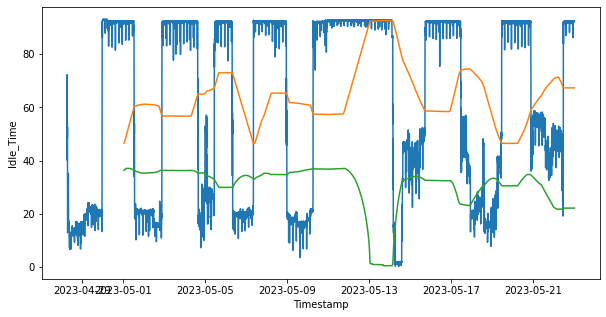

In [12]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df , x=df.index,y=df.Idle_Time)
sns.lineplot(data=df , x=df.index,y=df.rollMean)
sns.lineplot(data=df , x=df.index,y=df.rollStd)

In [13]:
### Adf Test To check the stationary of the Data

In [14]:
from statsmodels.tsa.stattools import adfuller 

In [15]:
adfTest = adfuller(df['Idle_Time'] , autolag='AIC')

In [16]:
adfTest

(-4.034283709137055,
 0.0012412570084666737,
 10,
 8900,
 {'1%': -3.4310849648393518,
  '5%': -2.8618648063186325,
  '10%': -2.5669428893952784},
 44482.105169820934)

In [17]:
stats = pd.Series(adfTest[0:4], index=['Test Statistic', 'p-value','#lags used','number of observations used'])
stats

Test Statistic                   -4.034284
p-value                           0.001241
#lags used                       10.000000
number of observations used    8900.000000
dtype: float64

In [18]:
## The Data is Stationary because the Test Statistics are lower than the Critical Values 

In [19]:
from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

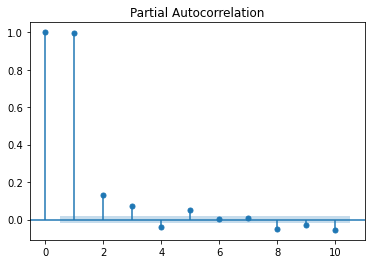

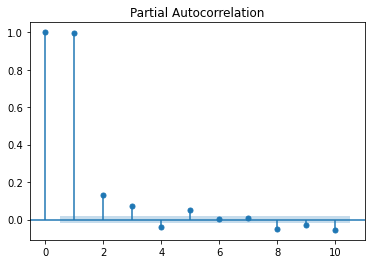

In [30]:
plot_pacf(df['Idle_Time'].dropna(),lags=10)

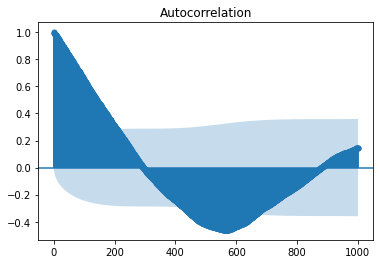

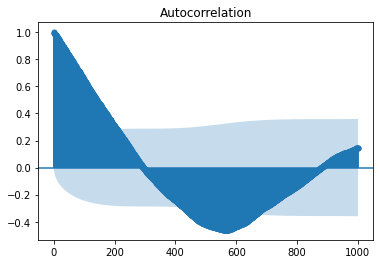

In [28]:
plot_acf(df['Idle_Time'].dropna(),lags=1000)

In [22]:
train = df[:round(len(df)*70/100)]
test = df[round(len(df)*70/100):]

In [23]:
model = ARIMA(train['Idle_Time'], order=(1,0,1))
model_fit = model.fit()

c:\Users\Arul\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\Users\Arul\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

In [24]:
prediction = model_fit.predict(start = test.index[0],end=test.index[-1])

In [25]:
df['arimaPred'] =  prediction
df.tail()

,Unnamed: 0,Processor Time,Idle_Time,Available,Disk_Time,rollMean,rollStd,arimaPred
Timestamp,,,,,,,,
2023-05-22 23:43:48.490,8906,4.613605,92.355495,8883,0.032694,67.335672,22.115128,60.472648
2023-05-22 23:47:48.490,8907,4.896507,92.338494,8872,0.032445,67.335535,22.114972,60.472661
2023-05-22 23:51:48.490,8908,4.652055,92.391400,8869,0.020792,67.335760,22.115226,60.472673
2023-05-22 23:55:48.490,8909,4.734080,92.438411,8883,0.028768,67.335830,22.115305,60.472685
2023-05-22 23:59:48.490,8910,4.846961,92.364885,8885,0.023240,67.335850,22.115329,60.472697


<AxesSubplot:xlabel='Timestamp', ylabel='Idle_Time'>

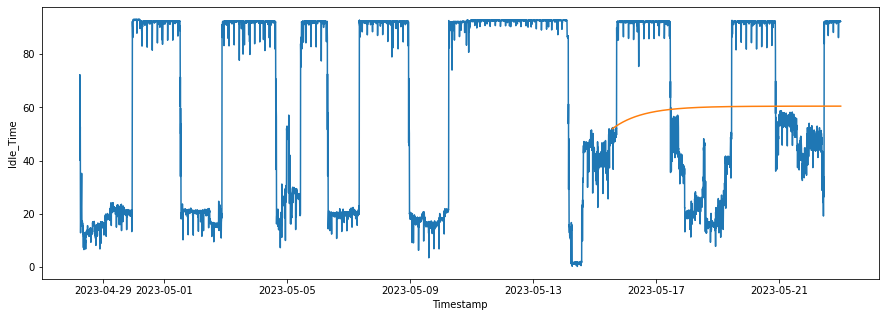

In [26]:
plt.figure(figsize=(15,5))

sns.lineplot(data=df, x=df.index, y='Idle_Time')
sns.lineplot(data=df, x=df.index, y='arimaPred')

In [27]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test['Idle_Time'],prediction))


30.039271930381148

SARIMA


In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

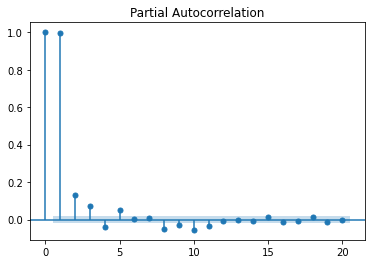

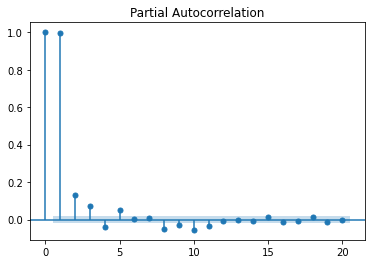

In [34]:
plot_pacf(df['Idle_Time'].dropna(), lags=20)

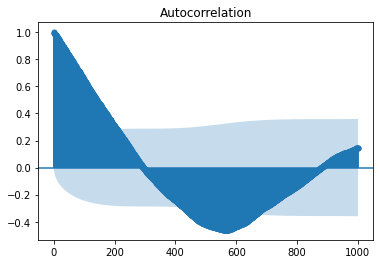

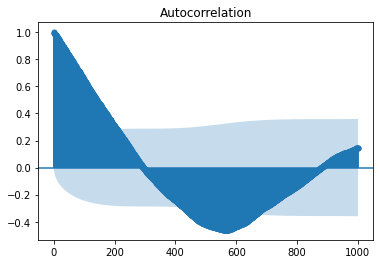

In [35]:
plot_acf(df['Idle_Time'].dropna(), lags=1000)

In [36]:
model = SARIMAX(train['Idle_Time'], order=(1,0,1), seasonal_order=(1,0,1,1000))
model_fit = model.fit()
prediction = model_fit.predict(start = test.index[0],end=test.index[-1])
df['sarimaxPred'] = prediction

c:\Users\Arul\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 4T will be used.
  warnings.warn('No frequency information was'
c:\Users\Arul\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 4T will be used.
  warnings.warn('No frequency information was'


In [ ]:
df.dropna()
sns.lineplot(data=df , x=df.index ,y='Idle_Time')
sns.lineplot(data=df , x=df.index ,y='sarimaxPred')